In [1]:
import torch
from torchvision.transforms.functional import to_pil_image
import numpy as np
import glob
import os
from PIL import Image
from tqdm import tqdm
import argparse
import json
import random
from model import DSD_demo_Model
from accelerate import Accelerator
import PIL


/opt/conda/envs/dsd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = DSD_demo_Model(model_path = './examples/final-checkpoint-47500')
accelerator = Accelerator()
model = accelerator.prepare(model)

Loaded noise samples from cache with shape:  torch.Size([1000, 4, 64, 64])


loading dataset refcocog into memory...
creating index...
index created.
DONE (t=7.51s)
Length of all pairs: 950100
Loading existing training data from ./refcoco_train_data.pkl
Using 902600 evaluation pairs


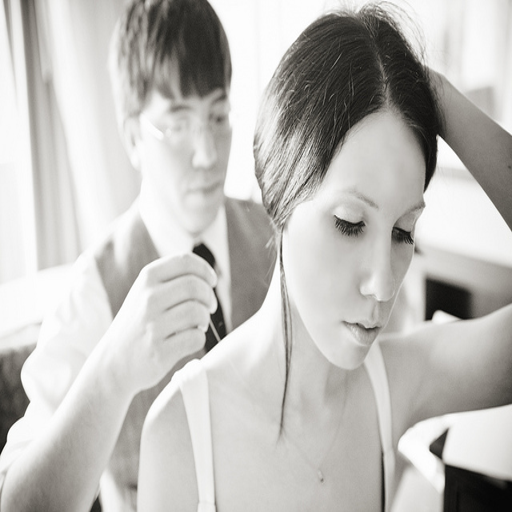

['lady touch her hair in hand',
 'the brown couch facing the left',
 'an old twin bed with a pillow and the blanket turned down against two walls in a small bedroom',
 'a man in a red plaid shirt petting an elephant',
 'sheep in cage all by itself',
 'Traffic light on right.',
 'khaki pants and striped shirt of the biggest person',
 'A computer monitor which is on with a scarecrow in the night as a background',
 'A man with glasses, wearing a green mushroom shirt.',
 'A wooden table with green bottles on it.']

In [3]:
from PIL import Image
from custom_datasets import get_dataset
from torch.utils.data import DataLoader
from eval_score import evaluate_scores


val_data = "Refcocog"
dataset = get_dataset(val_data, 'data', transform=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)


imgs, texts = dataset[0][0], dataset[0][1]
imgs, imgs_resize = imgs[0], imgs[1]

img = Image.open(imgs[0]).convert("RGB").resize((512,512))
img.show()

texts

In [4]:
text1 = texts[0]
text2 = texts[1]

score= model([text1], img)
score2= model([text2], img)
print(f'The positive text is: {text1}, the negative text is: {text2}, the score of the positve text is: {score}, the score of negative text is: {score2}.')

/home/ec2-user/diffusion-itm/diffusers/src/diffusers/image_processor.py:204: FutureWarning: Passing `image` as torch tensor with value range in [-1,1] is deprecated. The expected value range for image tensor is [0,1] when passing as pytorch tensor or numpy Array. You passed `image` with value range [-0.9686274528503418,1.0]
  warnings.warn(


The positive text is: lady touch her hair in hand, the negative text is: the brown couch facing the left, the score of the positve text is: tensor([0.4980]), the score of negative text is: tensor([0.4539]).


Loading data from data with eval
Loaded 2584 data


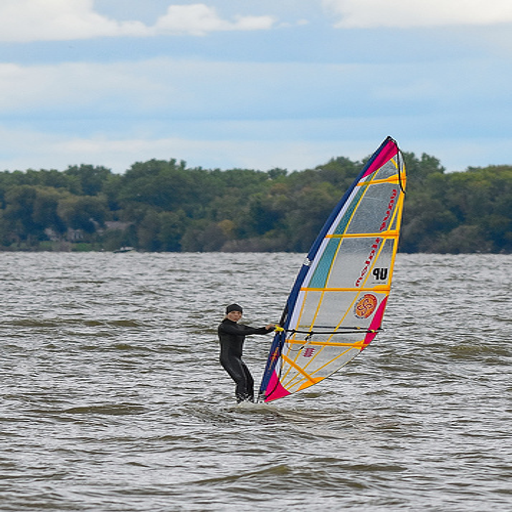

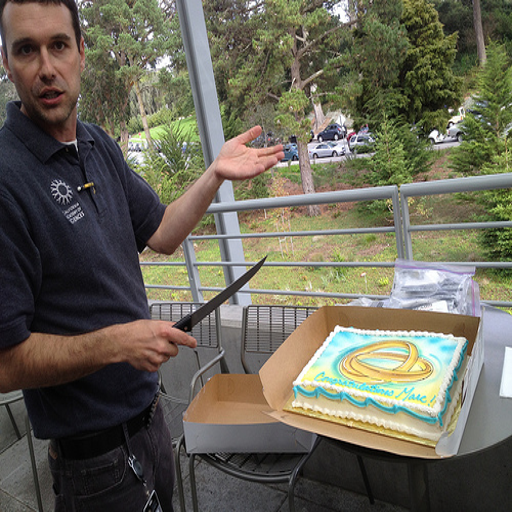

['a man is standing on the water.']

In [5]:
val_data = "ComVG_obj"
dataset = get_dataset(val_data, 'data', transform=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)


imgs, texts = dataset[0][0], dataset[0][1]
imgs, imgs_resize = imgs[0], imgs[1]

img = Image.open(imgs[0]).convert("RGB").resize((512,512))
img.show()

img2 = Image.open(imgs[1]).convert("RGB").resize((512,512))
img2.show()

texts

In [6]:
score= model(texts, img)
score2= model(texts, img2)
print(f'The text is {texts[0]}, The score of the positve image is {score}, the score of negative image is {score2}.')

        

/home/ec2-user/diffusion-itm/diffusers/src/diffusers/image_processor.py:204: FutureWarning: Passing `image` as torch tensor with value range in [-1,1] is deprecated. The expected value range for image tensor is [0,1] when passing as pytorch tensor or numpy Array. You passed `image` with value range [-1.0,1.0]
  warnings.warn(


The text is a man is standing on the water., The score of the positve image is tensor([0.4823]), the score of negative image is tensor([0.4480]).


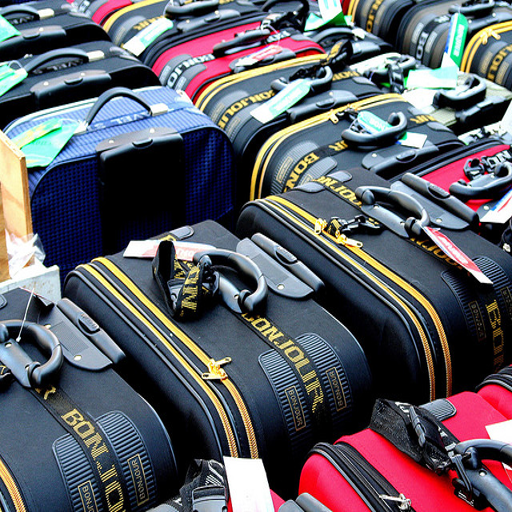

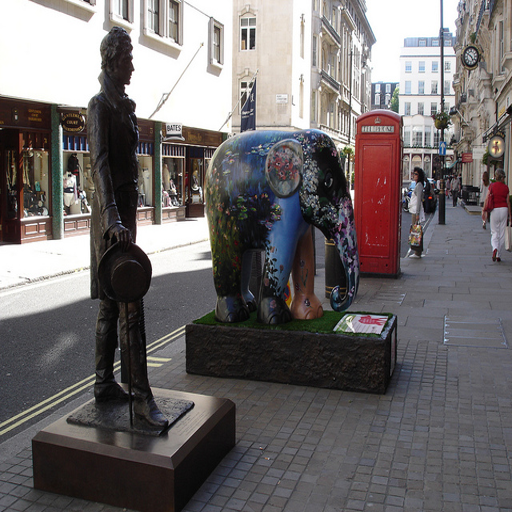

['are the suitcases for sale? the suitcases are not for sale']

In [7]:
val_data = "vqa_binary"
dataset = get_dataset(val_data, 'data', transform=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)


imgs, texts = dataset[0][0], dataset[0][1]
imgs, imgs_resize = imgs[0], imgs[1]

img = Image.open(f'../vqav2/val2014/{imgs[0]}').convert("RGB").resize((512,512))
img.show()

img2 = Image.open(f'../vqav2/val2014/{imgs[1]}').convert("RGB").resize((512,512))
img2.show()

texts

In [8]:
score= model(texts, img)
score2= model(texts, img2)
print(f'The score of the positve img is: {score}, the score of negative img is: {score2}.')

The score of the positve img is: tensor([0.5045]), the score of negative img is: tensor([0.4742]).
